<a href="https://colab.research.google.com/github/PraneetVR/IIITDMJ-DL-Summer-School-Program-Assignments/blob/main/Week_2_Day_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 2 Day 3 Assignment
##Objective:
Use Recurrent Neural Networks (RNN) to learn patterns in daily temperature data and predict the next day’s maximum temperature based on the last 30 days.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,SimpleRNN, Dense
import matplotlib.pyplot as plt

#1. Load & Inspect Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

train_df = pd.read_csv("/content/drive/MyDrive/DailyDelhiClimateTrain.csv", parse_dates=['date'])
test_df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTest.csv', parse_dates=['date'])

Mounted at /content/drive


Train Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB
None

First 5 rows of the dataset:
        date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000


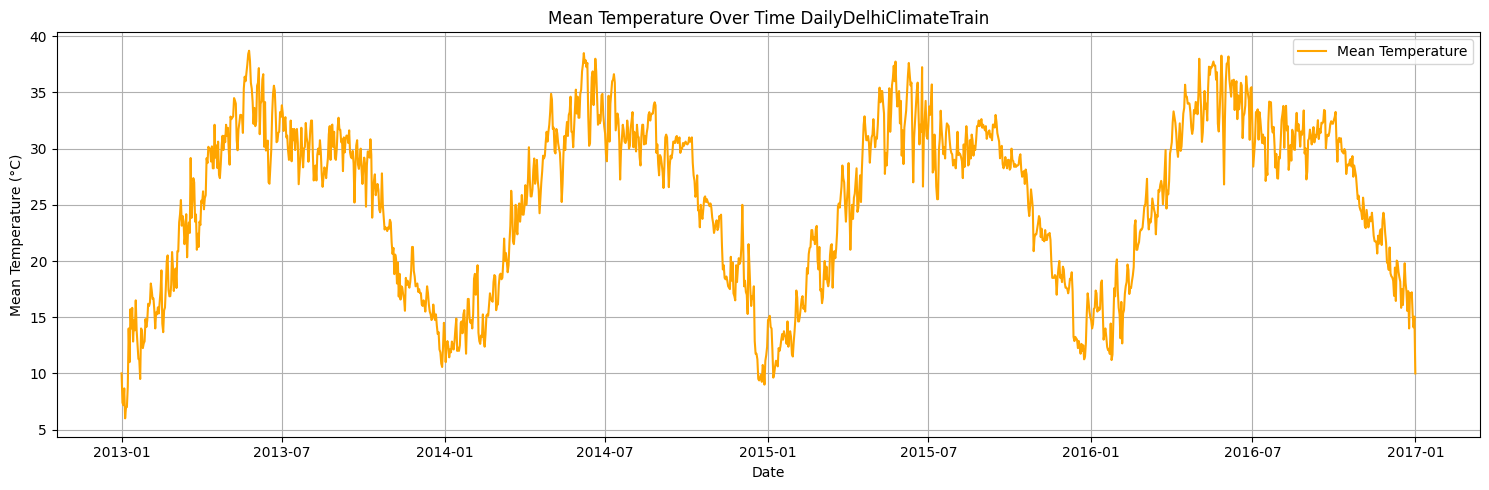

Test Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB
None

First 5 rows of the dataset:
        date   meantemp   humidity  wind_speed  meanpressure
0 2017-01-01  15.913043  85.869565    2.743478     59.000000
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333


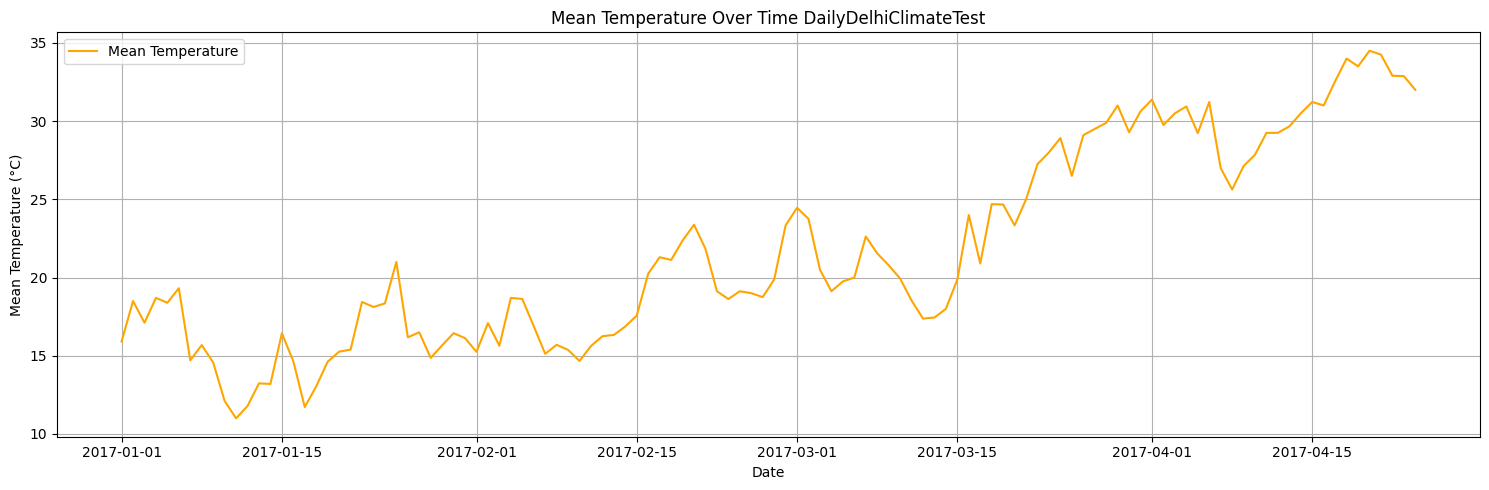

In [ ]:
#train dataset
print("Train Dataset Information:")
print(train_df.info())

print("\nFirst 5 rows of the dataset:")
print(train_df.head())

plt.figure(figsize=(15, 5))
plt.plot(train_df['date'], train_df['meantemp'], color='orange', label='Mean Temperature')
plt.title('Mean Temperature Over Time DailyDelhiClimateTrain')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Test dataset
print("Test Dataset Information:")
print(test_df.info())

print("\nFirst 5 rows of the dataset:")
print(test_df.head())

plt.figure(figsize=(15, 5))
plt.plot(test_df['date'], test_df['meantemp'], color='orange', label='Mean Temperature')
plt.title('Mean Temperature Over Time DailyDelhiClimateTest')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#2 . Preprocess the Data

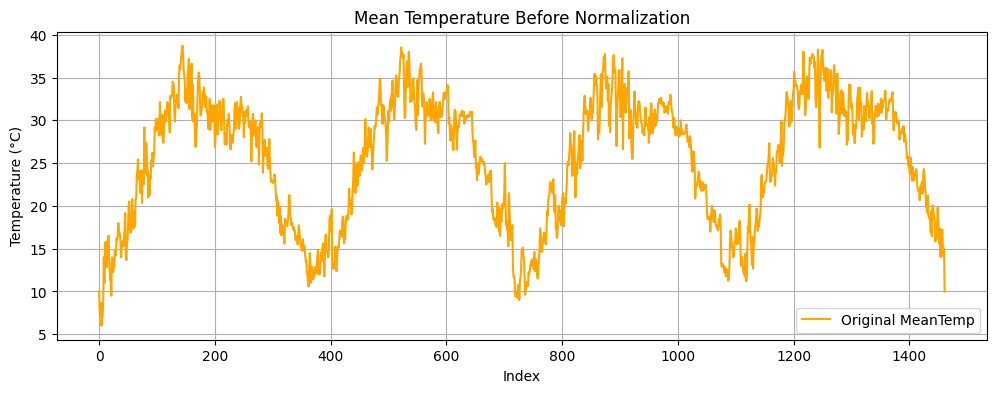

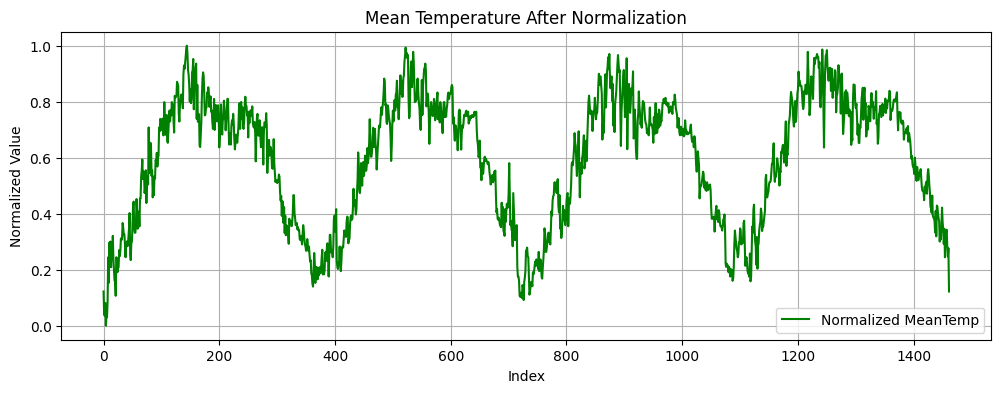

In [ ]:
from sklearn.preprocessing import MinMaxScaler

temp_values = train_df['meantemp'].values.reshape(-1, 1)

plt.figure(figsize=(12, 4))
plt.plot(temp_values, color='orange', label='Original MeanTemp')
plt.title('Mean Temperature Before Normalization')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
temp_scaled = scaler.fit_transform(temp_values)

plt.figure(figsize=(12, 4))
plt.plot(temp_scaled, color='green', label='Normalized MeanTemp')
plt.title('Mean Temperature After Normalization')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

#3. Create Sequences for Prediction

In [ ]:
def create_sequences(data, seq_length=30):
    x = []
    y = []

    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])

    x = np.array(x)
    y = np.array(y)

    x = x.reshape((x.shape[0], x.shape[1], 1))

    return x, y

In [ ]:
x, y = create_sequences(temp_scaled, seq_length=30)

print("x shape:", x.shape)  # Expected: (samples, 30, 1)
print("y shape:", y.shape)  # Expected: (samples,)

x shape: (1432, 30, 1)
y shape: (1432, 1)


#4. Build & Compile an RNN Model

In [ ]:
model = Sequential([
    Input(shape=(30, 1)),
    SimpleRNN(units=50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

#5. Train the Model & Visualize Loss

In [ ]:
history = model.fit(
    x, y,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0325 - val_loss: 0.0043
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027 - val_loss: 0.0044
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - val_loss: 0.0026


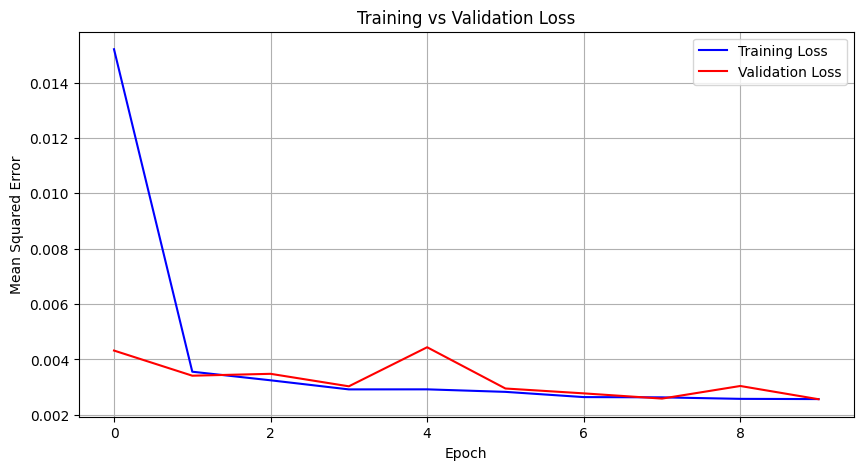

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

#6. Evaluate Model & Plot Predictions

In [ ]:
temp_test_values = test_df['meantemp'].values.reshape(-1, 1)
test_scaled = scaler.fit_transform(temp_test_values)
x_test, y_test = create_sequences(test_scaled, seq_length=30)

In [ ]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step


In [ ]:
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

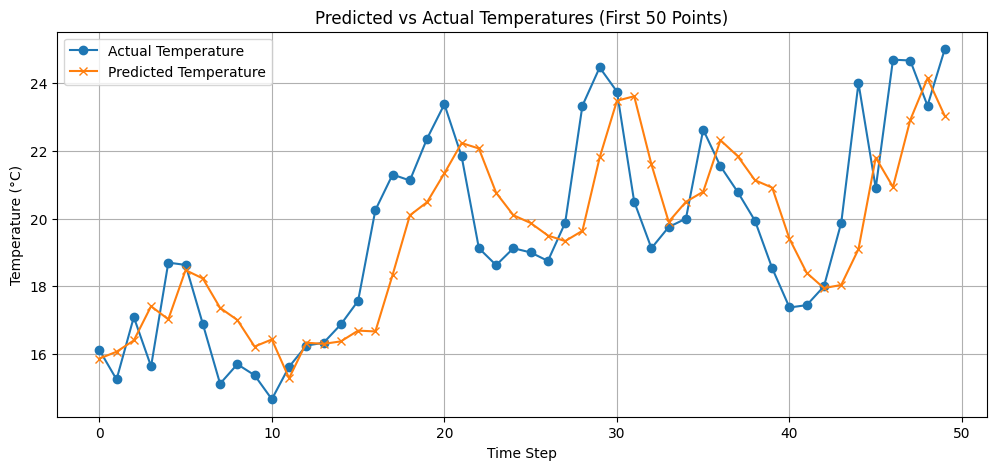

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:50], label='Actual Temperature', marker='o')
plt.plot(y_pred_inv[:50], label='Predicted Temperature', marker='x')
plt.title('Predicted vs Actual Temperatures (First 50 Points)')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()